# Exploratory Data Analysis Starter

## Import packages

In [1]:
# pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        colormap='RdGy',
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=12)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, title_, bins_):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                        "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, title = title_, colormap='RdGy')
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

### Churn

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

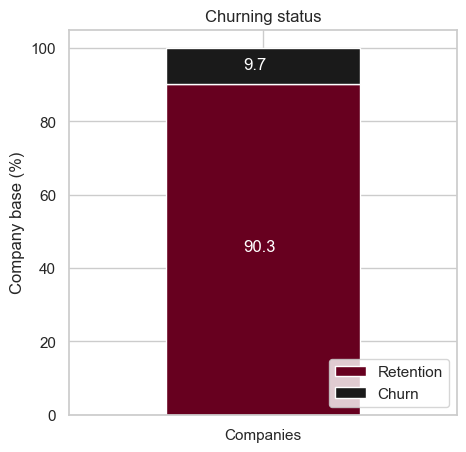

In [11]:
sns.set(style="whitegrid")

# Create a churn df
churn = client_df[['id', 'churn']]

# Rename columns
churn.columns = ['Companies', 'churn'] 

# Count the number of companies that churned or not
churn_total = churn.groupby(churn['churn']).count()

# Calculate the percentage of churned/retained companies
churn_percentage = churn_total / churn_total.sum() * 100

# Plot styacked bars
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The customer churn percentage is about 10%

### Consumption

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

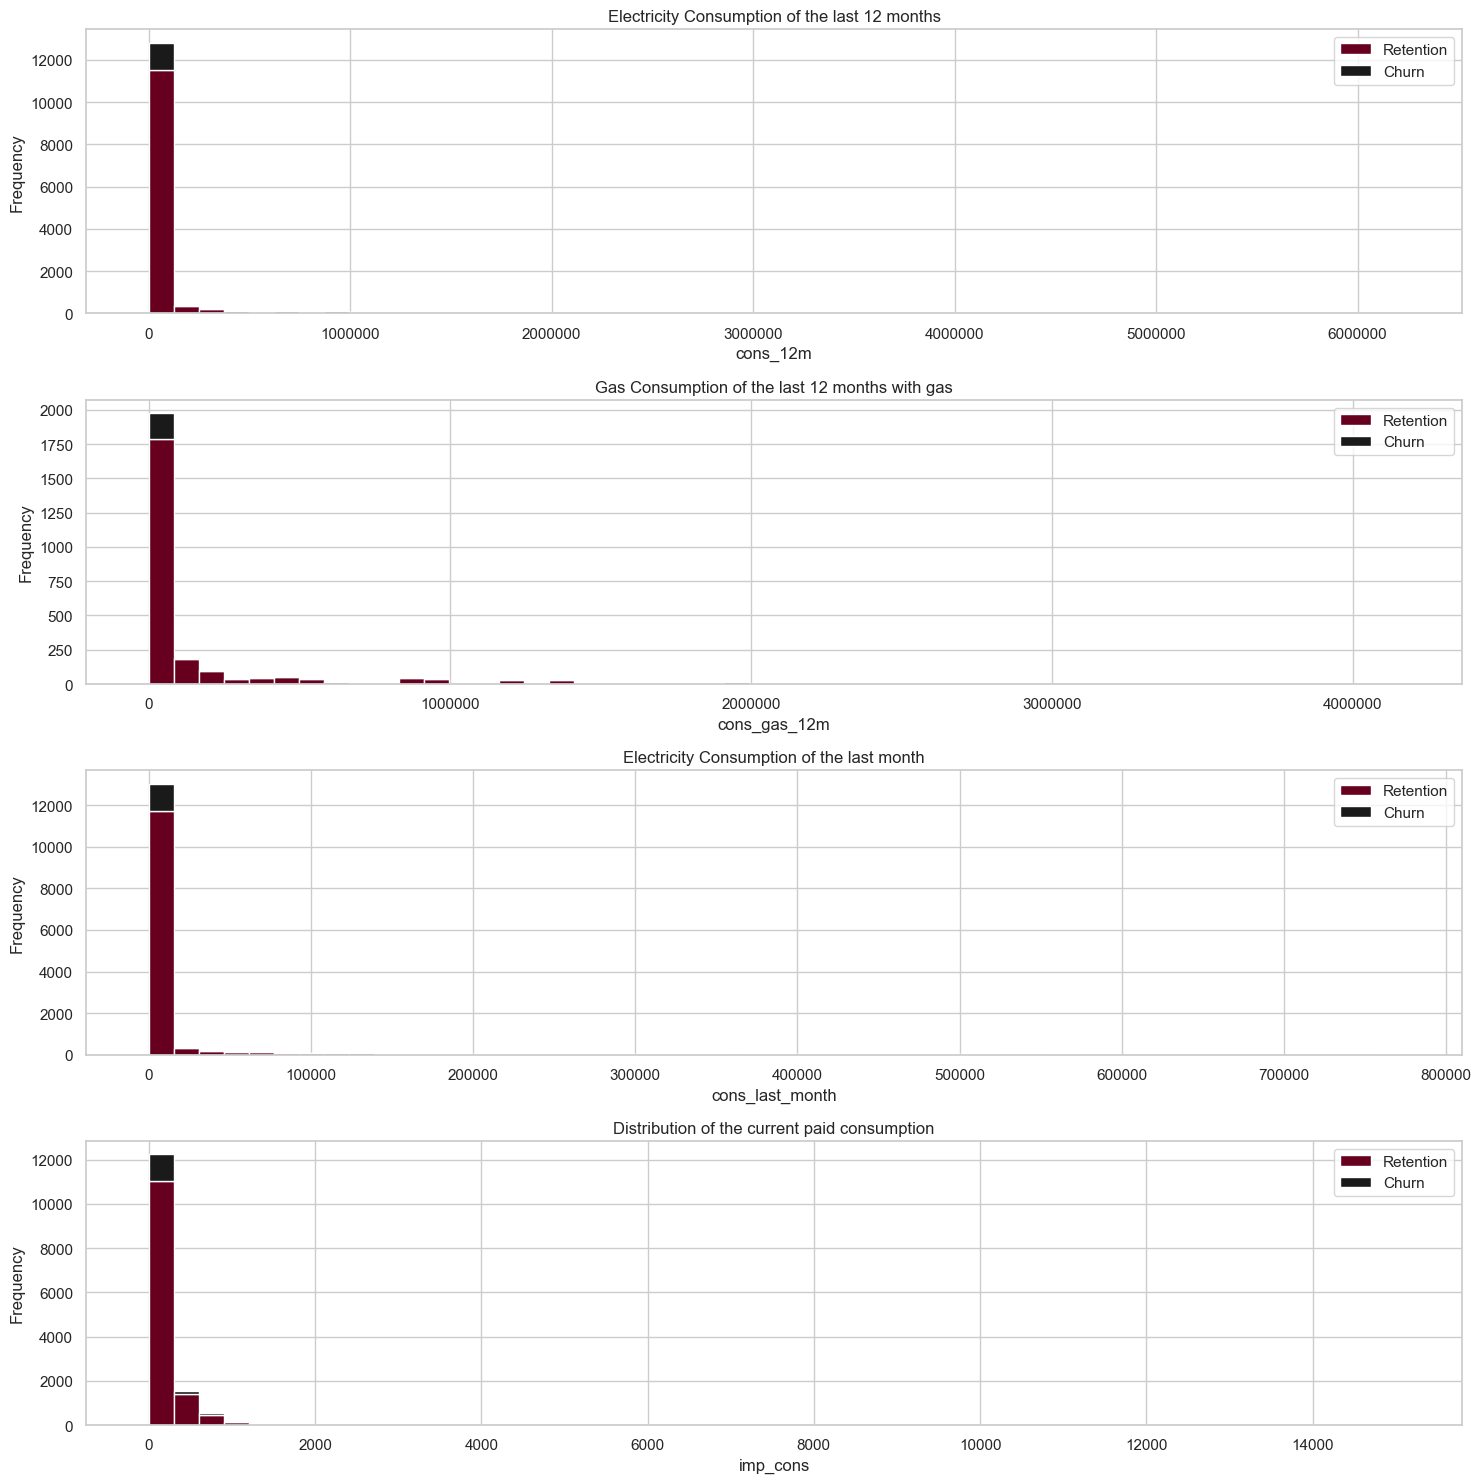

In [12]:
# Choose consumption-related columns
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(15, 15))

# Unpack the axes
ax1, ax2, ax3, ax4 = axs

# Plot histograms
plot_distribution(consumption, 'cons_12m', ax1, title_='Electricity Consumption of the last 12 months', bins_=50)
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', ax2, title_='Gas Consumption of the last 12 months with gas',bins_=50)
plot_distribution(consumption, 'cons_last_month', ax3, title_='Electricity Consumption of the last month',bins_=50)
plot_distribution(consumption, 'imp_cons', ax4, title_='Distribution of the current paid consumption',bins_=50)

plt.tight_layout()

The distribution of consumtion variables are highly skewed to the right, presenting a long right tail towards higher values. These values on the higher and lower end of the distribution is potentially outliers.

Can use boxplot to assess outliers

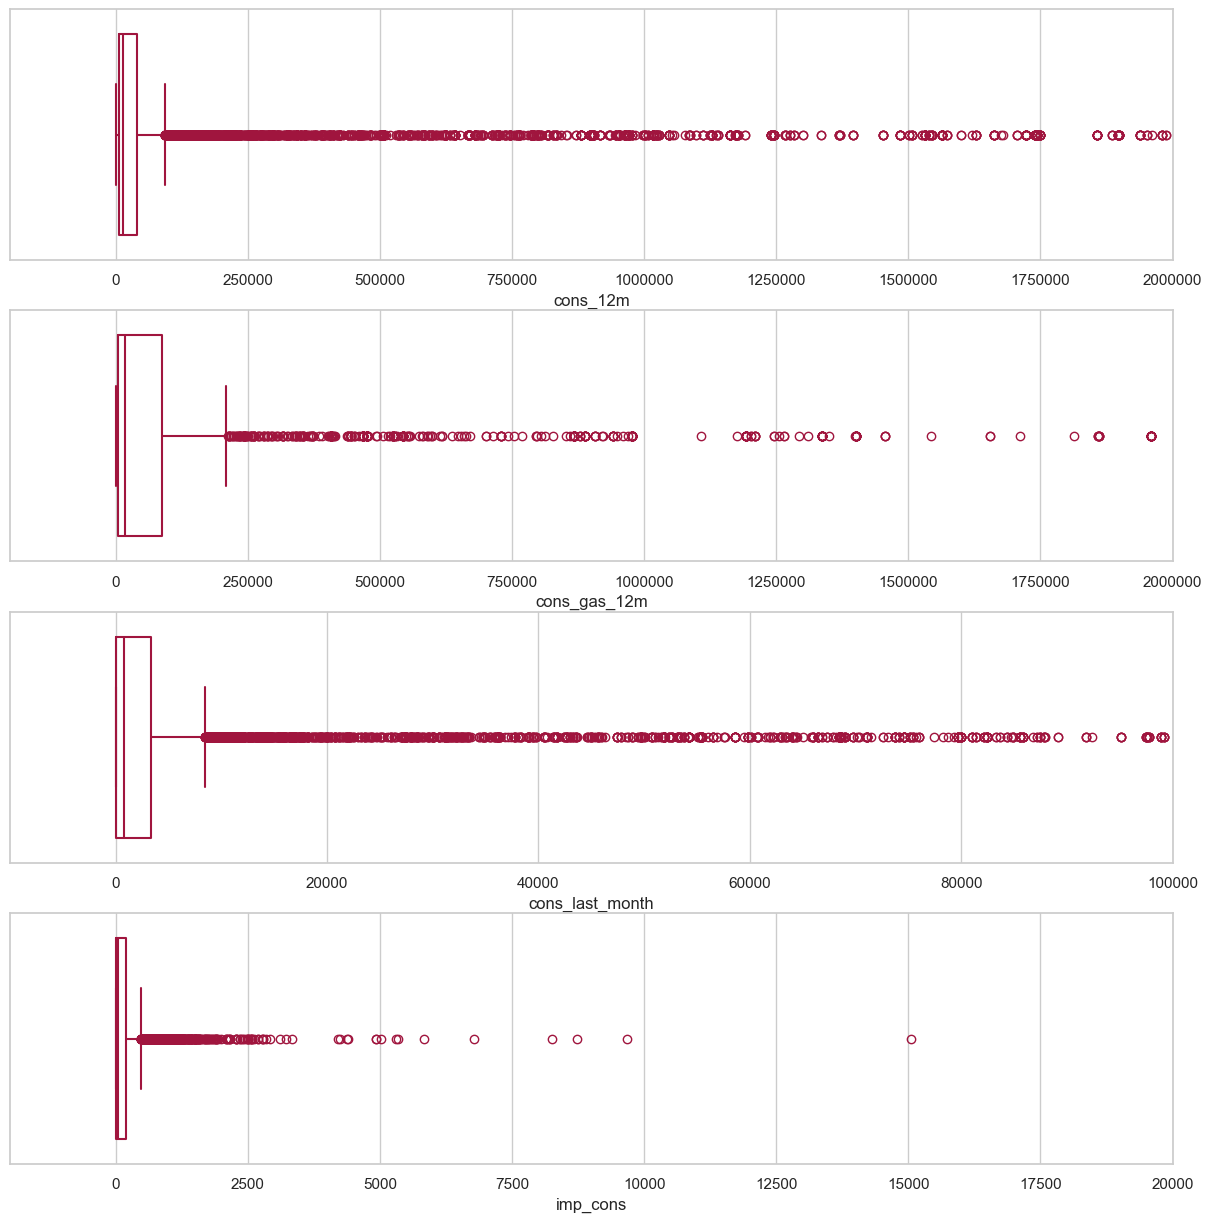

In [13]:
# Create subplots
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))

# Boxplots
sns.boxplot(consumption['cons_12m'], ax=ax[0], orient='h', color= '#A0153E', fill=False)
sns.boxplot(consumption[consumption['has_gas'] == 't']['cons_gas_12m'], ax=ax[1], orient='h', color = '#A0153E', fill= False)
sns.boxplot(consumption['cons_last_month'], ax=ax[2], orient='h', color = '#A0153E', fill=False)
sns.boxplot(consumption['imp_cons'], ax=ax[3], orient='h', color = '#A0153E', fill=False)

# Remove scientific notation
for axes in ax:
    axes.ticklabel_format(style='plain', axis='x')
    
# Set x-axis limit
ax[0].set_xlim(-200000, 2000000)
ax[1].set_xlim(-200000, 2000000)
ax[2].set_xlim(-10000, 100000)
ax[3].set_xlim(-2000, 20000)

plt.show()

### Sales Channel and Electricity Campaign

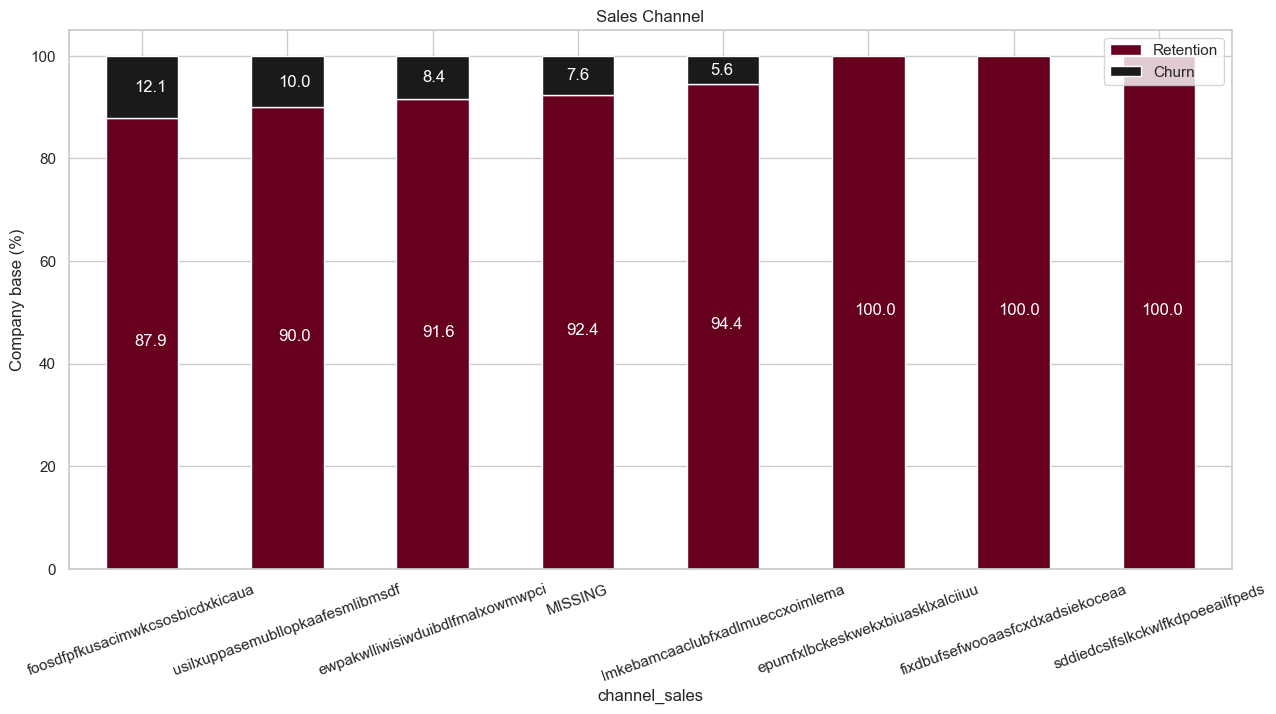

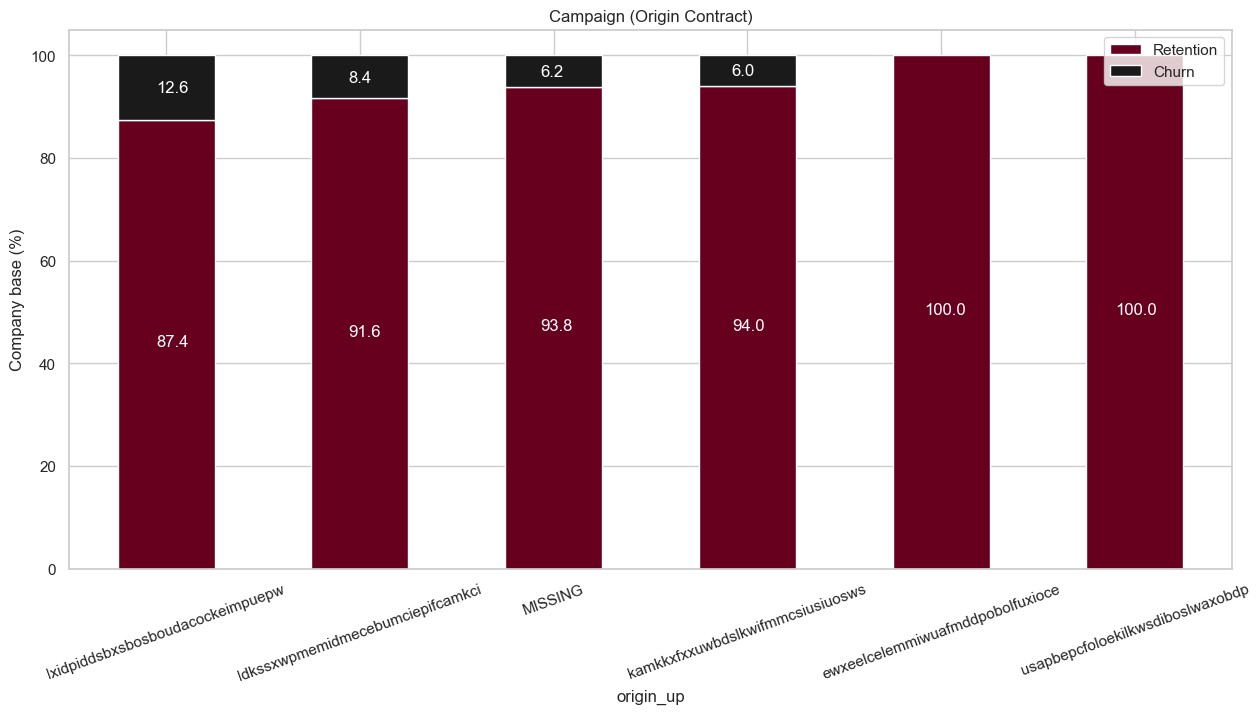

In [14]:
# Count the number of companies based on the sales channel

sales = client_df[['id', 'channel_sales', 'origin_up', 'churn']]

# Count the number of companies in each channel and campaign based on churn
channel_total = sales.groupby([sales['channel_sales'], sales['churn']])['id'].count().unstack(level=1).fillna(0)

campaign_total = sales.groupby([sales['origin_up'], sales['churn']])['id'].count().unstack(level=1).fillna(0)

# Calculate the percentage of churned/retained companies
channel_percentage = (channel_total.div(channel_total.sum(axis=1), axis=0)*100).sort_values(by=[0], ascending=True)

campaign_percentage = (campaign_total.div(campaign_total.sum(axis=1), axis=0)*100).sort_values(by=[0], ascending=True)

# Plot stacked bars
plot_stacked_bars(channel_percentage, 'Sales Channel', (15,7), rot_=20, legend_='upper right')

plot_stacked_bars(campaign_percentage, 'Campaign (Origin Contract)', (15,7), rot_=20, legend_='upper right')

plt.show()

In [15]:
# Mosaic plot
# from statsmodels.graphics.mosaicplot import mosaic
# mosaic(data=sales, index = ['churn', 'channel_sales'], title='Mosaic Chart')

- Churned customers are distributed across 5 sales channels and 4 electricity campaigns

- There are a number of Missing Values which needs to be analyzed and treated appropriately

- This distribution may be an important factor to have a closer look into when evaluating or redesigning products for future marketing and sales strategies to retain customers.

### Contract Type

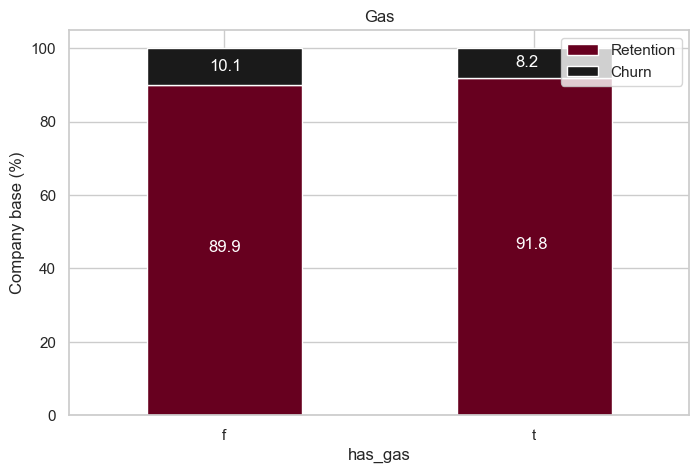

In [16]:
# Create a gas dataframe
gas = client_df[['id', 'has_gas', 'churn']]

# Count the number of companies with or without gas based on churn
gas_total = gas.groupby([gas['churn'], gas['has_gas']])['id'].count().unstack(level=0).fillna(0)

# Calculate the percentage of churned/retained companies
gas_percentage = (gas_total.div(gas_total.sum(axis=1), axis=0)*100).sort_values(by=[0], ascending=True)

plot_stacked_bars(gas_percentage, 'Gas', (8,5), legend_='upper right')

According to this, companies that has gas contract tend to have a slightly lower customer churn percentage compared to those don't have

### Number of active products and services and  antiquity of the client

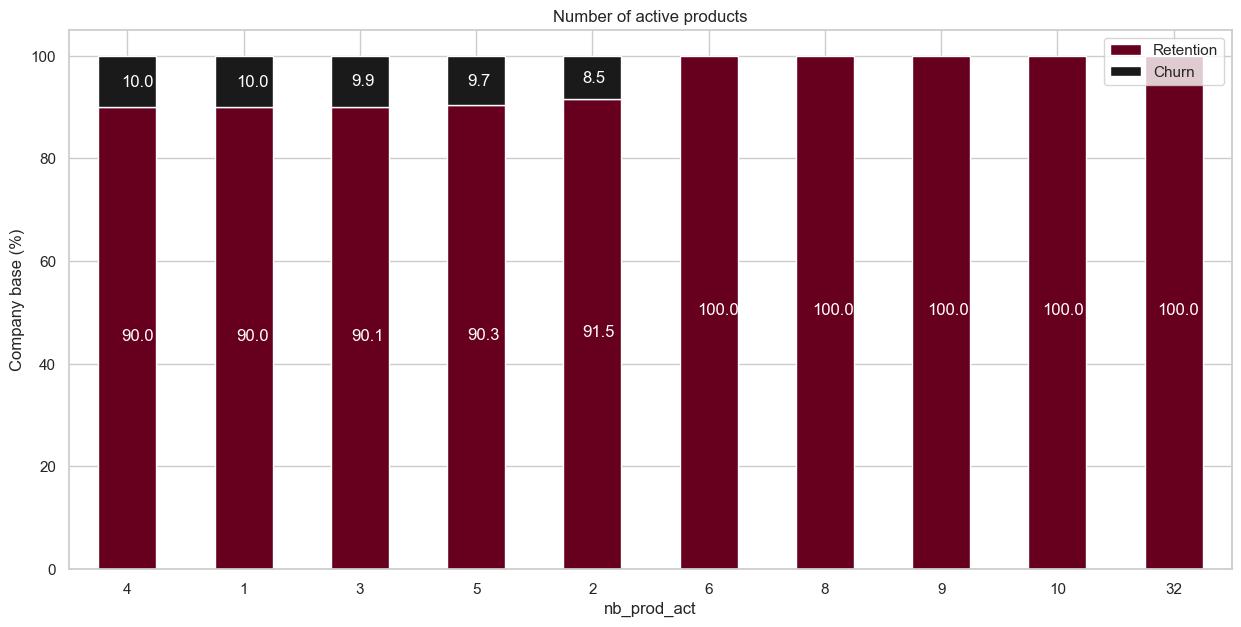

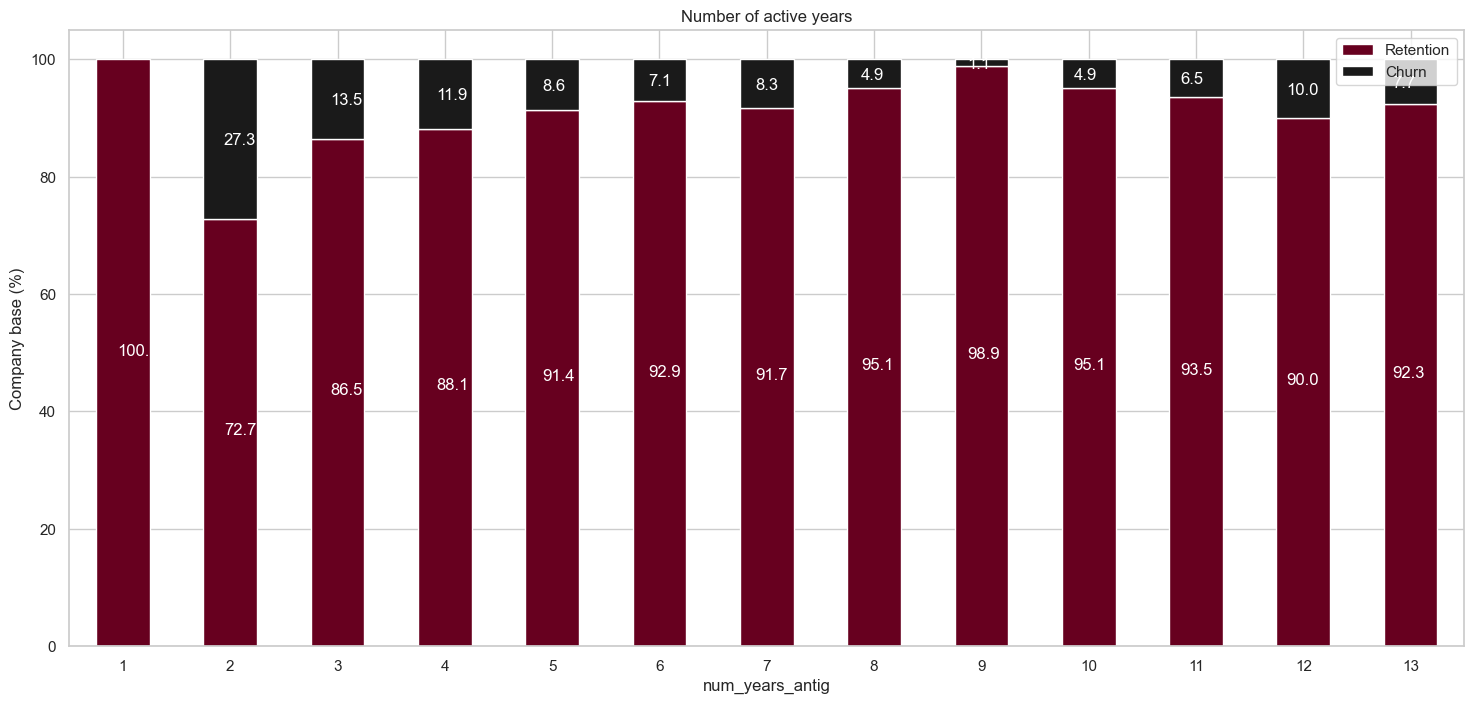

In [17]:
# Create dataframe with the number of products and years active and churn
active_product = client_df[['id', 'nb_prod_act', 'num_years_antig', 'churn']]

# Count the number of companies with active products and years based on churn
product_total = active_product.groupby([active_product['nb_prod_act'], active_product['churn']])['id'].count().unstack(level = 1).fillna(0)

years_total = active_product.groupby([active_product['num_years_antig'], active_product['churn']])['id'].count().unstack(level = 1).fillna(0)

# Calculate the percentage of churned/retained companies
product_percentage = (product_total.div(product_total.sum(axis=1), axis=0) * 100).sort_values(by=[0], ascending=True)

years_percentage = (years_total.div(years_total.sum(axis=1), axis=0) * 100)

# Plot stacked bars
plot_stacked_bars(product_percentage, 'Number of active products', (15,7), rot_=0, legend_='upper right')
plot_stacked_bars(years_percentage, 'Number of active years', (18,8), rot_=0, legend_='upper right')

Companies with less than 5 products exhibit a higher tendency towards churn.

Meanwhile, companies with 1 year active usually do not churn soon, but the churn percentage is significant for clients of 2, 3, 4 and notable 12 years

### Subscribed Power

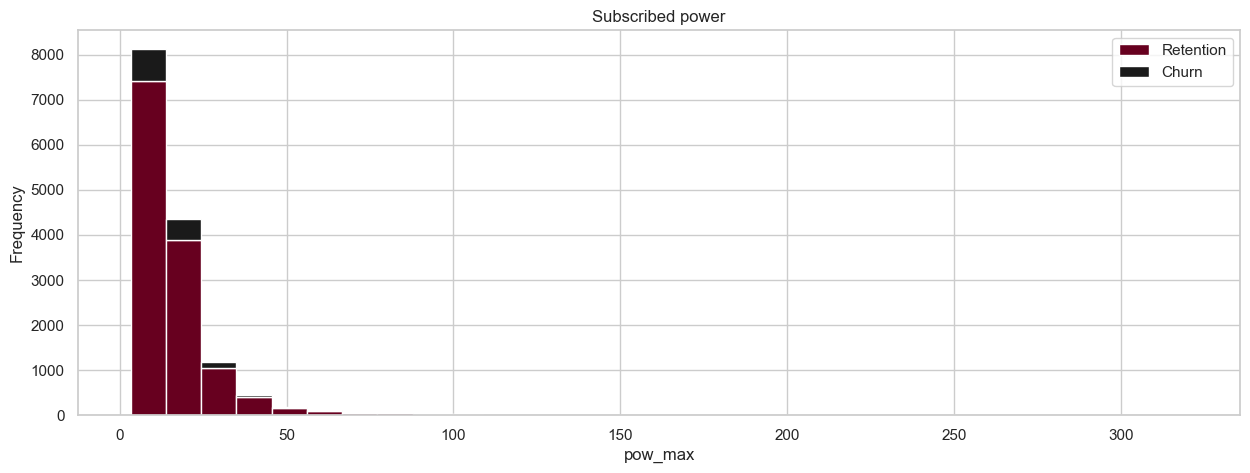

In [18]:
# Create a dataframe with subcribed power and churn
sub_power = client_df[['id', 'pow_max', 'churn']]

# Plot distribution
fig, ax = plt.subplots(nrows=1, figsize=(15, 5))

plot_distribution(sub_power, 'pow_max', ax=ax, title_='Subscribed power', bins_=30)

<Axes: xlabel='pow_max'>

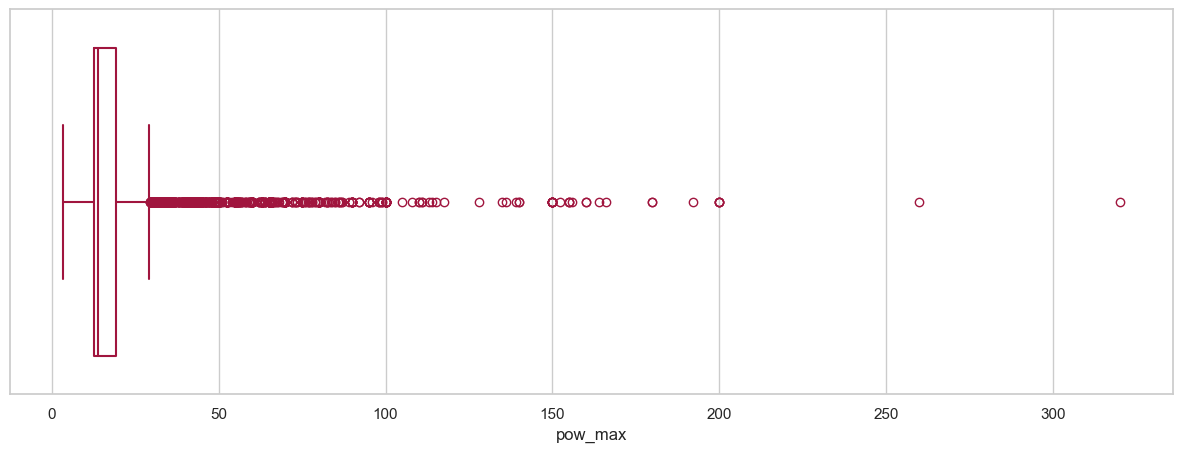

In [19]:
# Boxplot 
fig, ax = plt.subplots(nrows=1, figsize=(15, 5))

sns.boxplot(sub_power['pow_max'], ax=ax, orient='h', color = '#A0153E', fill=False)

Most customers subscribe to low power levels where churn seems to occur predominantly.

### Margin

In [37]:
# Create margin dataframe
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin','churn']]

margin[margin['margin_gross_pow_ele'] != margin['margin_net_pow_ele']]

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin,churn
4876,9590c7a6100ae76ec078aa177ffb8d0d,64.28,57.59,3215.03,0
10756,2df10d02d00fd4c85d367dd6287671bc,40.88,9.54,61.37,0


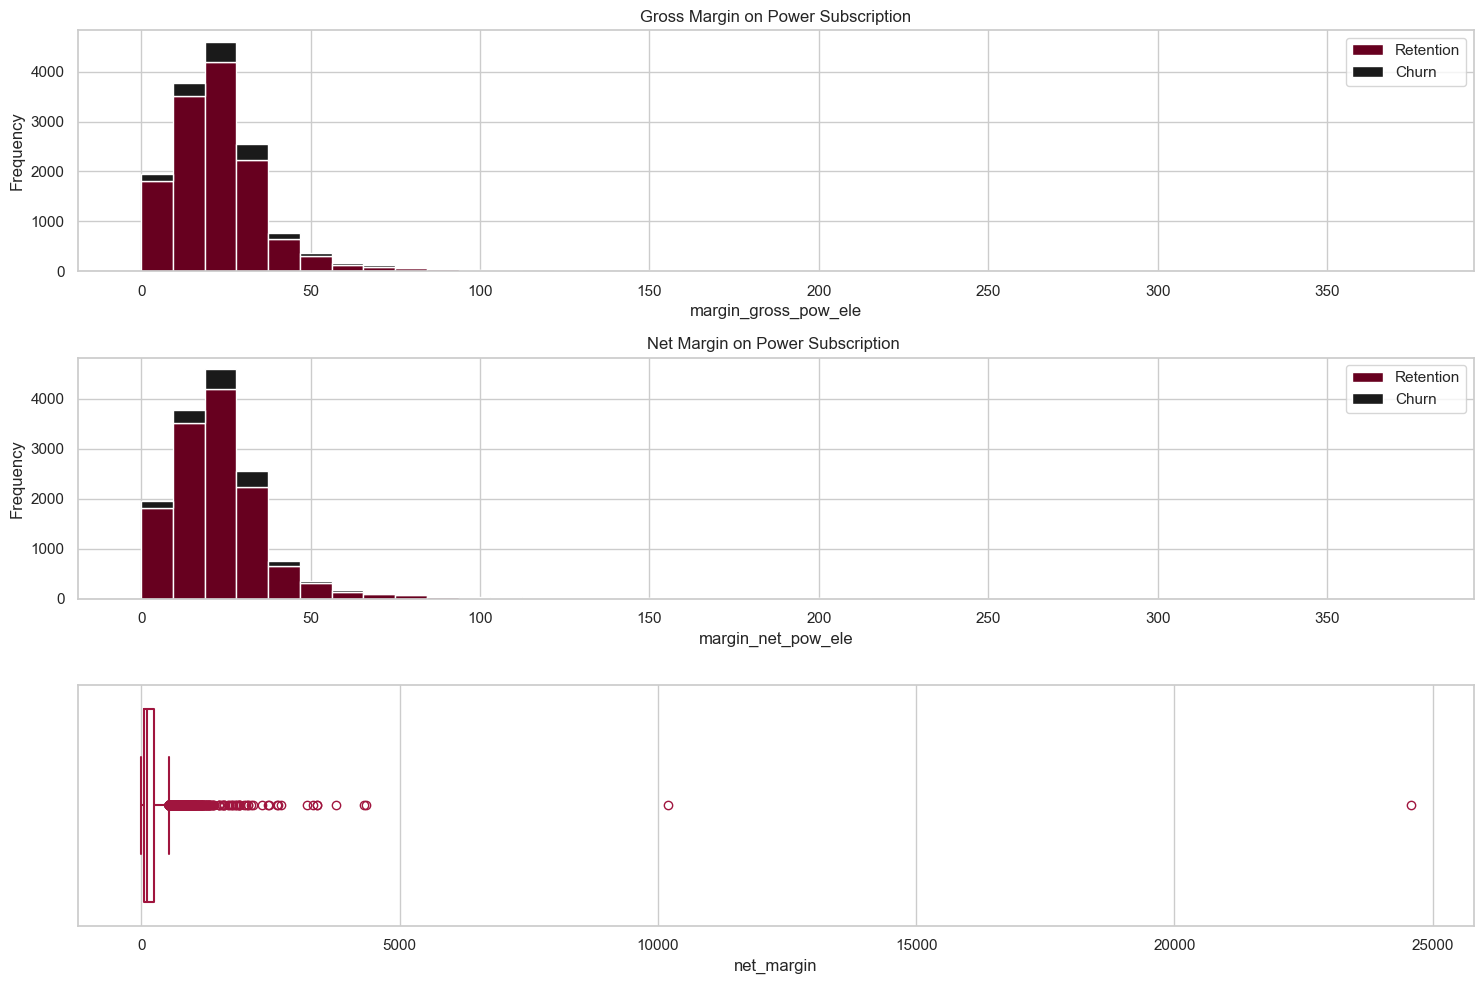

In [44]:
# Plot distribution
fig, ax = plt.subplots(nrows=3, figsize=(15, 10))

plot_distribution(margin, 'margin_gross_pow_ele', ax=ax[0], title_='Gross Margin on Power Subscription', bins_=40)
plot_distribution(margin, 'margin_net_pow_ele', ax=ax[1], title_='Net Margin on Power Subscription ', bins_=40)

# Boxplot
sns.boxplot(margin['net_margin'], orient='h', color = '#A0153E', fill=False)

plt.tight_layout()


- Gross margin and Net margin on power subscriptions are nearly identical for most customers, differing in only 2 out of over 14,000 instances.
- Net margin on power subscriptions is primarily concentrated in the 10-40 range, with some potential outliers at the higher end. Customers who generate a lower gross margin (less than 40) from their power subscriptions are more likely to churn. This may be due to low revenue (e.g., customers using a low level of power or paying a low rate) and high costs associated with serving these customers (such as location, infrastructure needs, or other operational costs).
- Total Net Margin is generally low, with 75% of observations falling below 243. However, the maximum net margin reaches nearly 25,000.

--> Strategies to consider improve margin for low-margin customers or target higher-margin customers for retention efforts depending on total revenue

### Forecast

In [45]:
# Create forecast dataframe
forecast = client_df[['id', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 
                      'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn']]

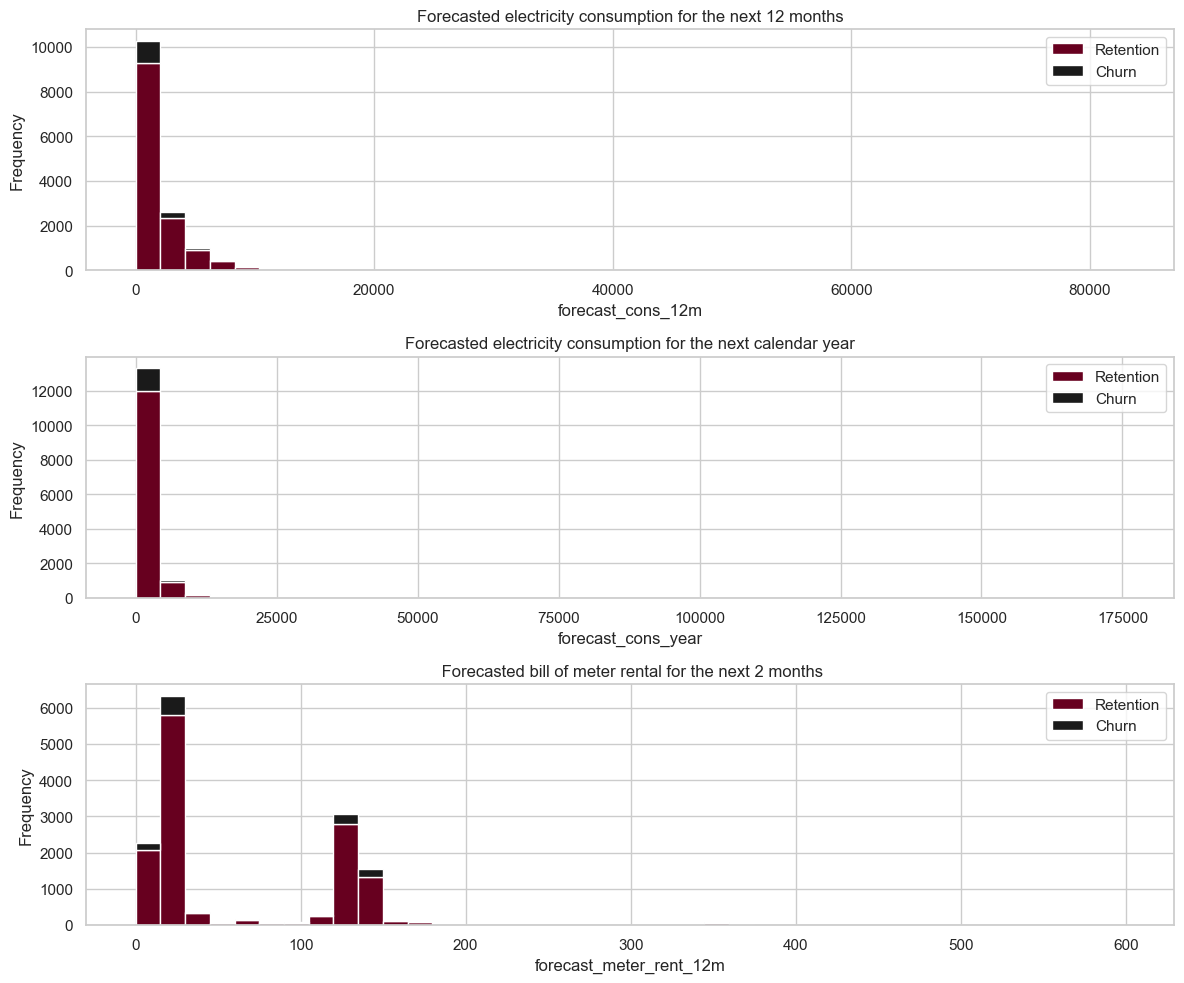

In [62]:
# Plot

fig, ax = plt.subplots(nrows=3, figsize=(12,10))

plot_distribution(forecast, 'forecast_cons_12m', ax=ax[0], title_='Forecasted electricity consumption for the next 12 months', bins_=40)
plot_distribution(forecast, 'forecast_cons_year', ax=ax[1], title_='Forecasted electricity consumption for the next calendar year', bins_=40)
plot_distribution(forecast, 'forecast_meter_rent_12m', ax=ax[2], title_=' Forecasted bill of meter rental for the next 2 months', bins_=40)

plt.tight_layout()


Forecasted bill of meter rent for the next 2 months shows multimodal distribution which suggests the presence of two types of customers

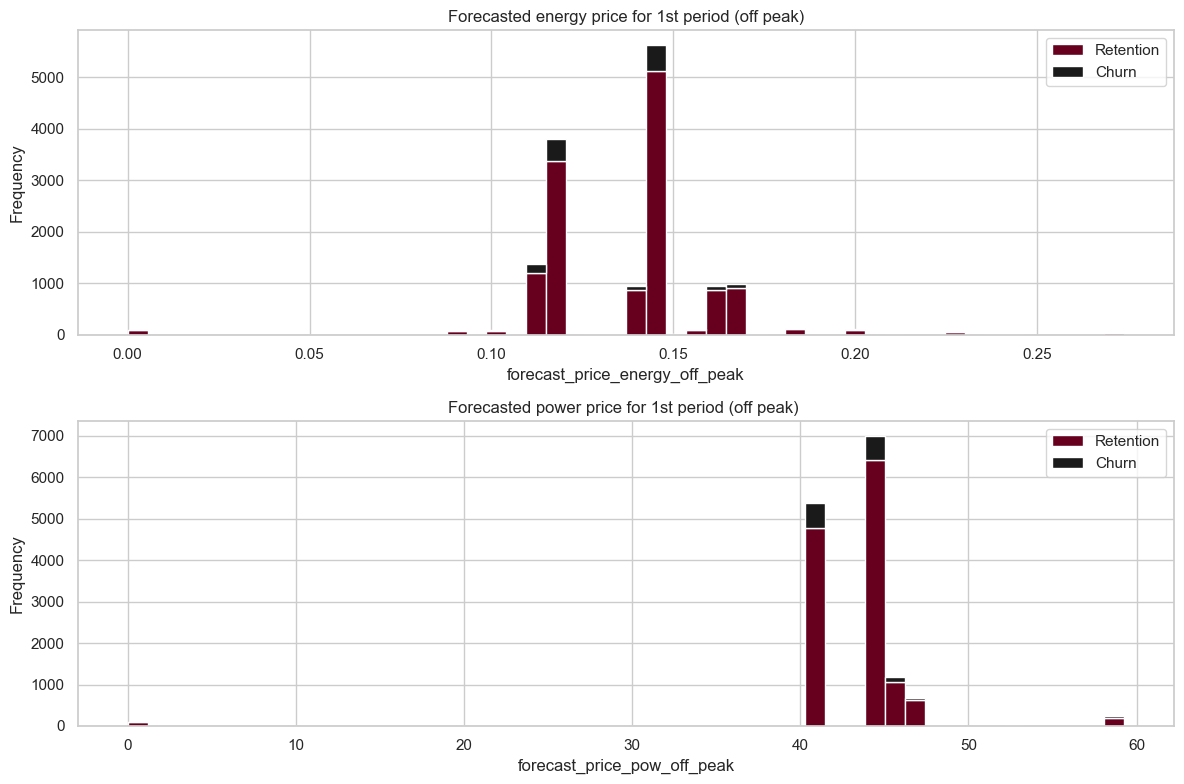

In [99]:
fig, ax = plt.subplots(nrows=2, figsize=(12,8))

plot_distribution(forecast, 'forecast_price_energy_off_peak', ax = ax[0], title_='Forecasted energy price for 1st period (off peak)', bins_=50)
plot_distribution(forecast, 'forecast_price_pow_off_peak', ax=ax[1], title_='Forecasted power price for 1st period (off peak) ', bins_=50)

plt.tight_layout()


Forecasted energy price for 1st period (off peak):

- Multimodel distribution, with common price ranges centering around 0.1 - 0.15
- At a higher energy price, there exhibits some price sensitivity. However, churn rate is not very high for price > 0.15

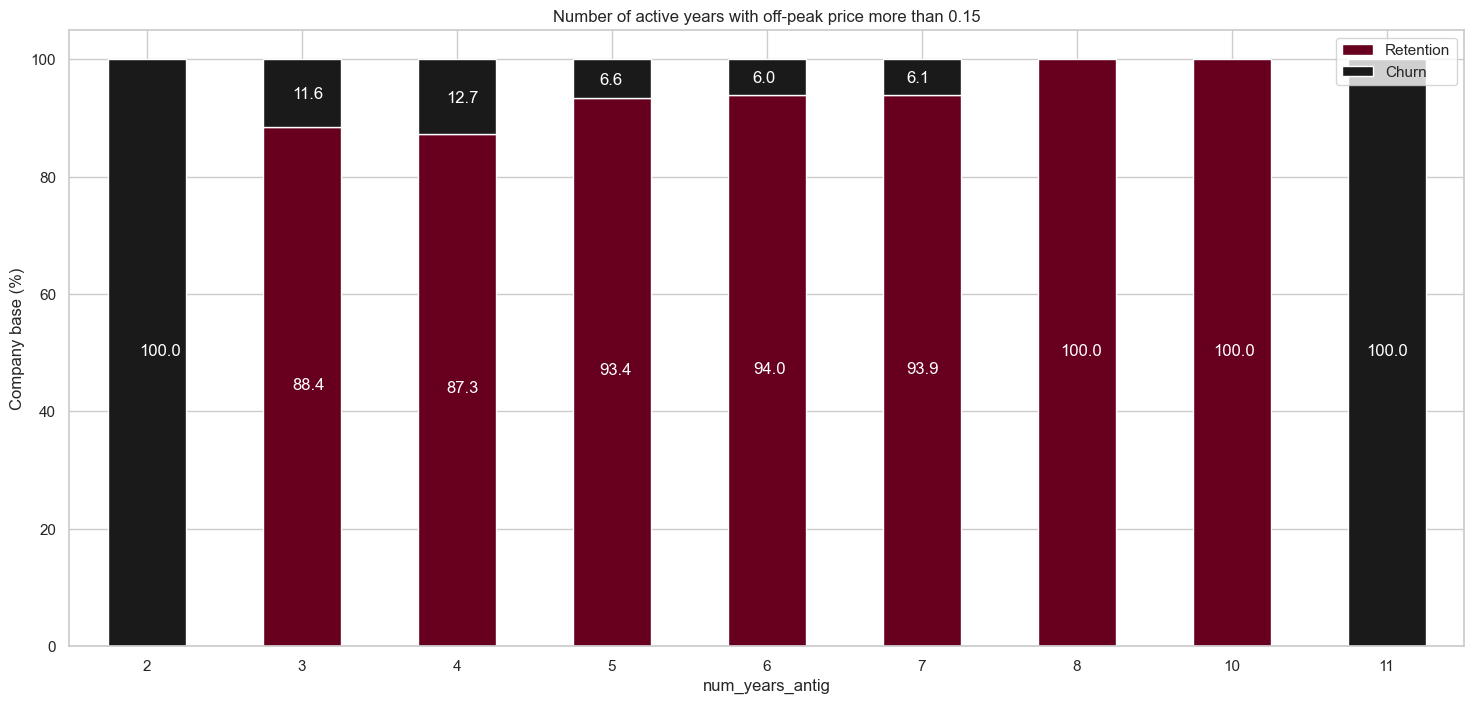

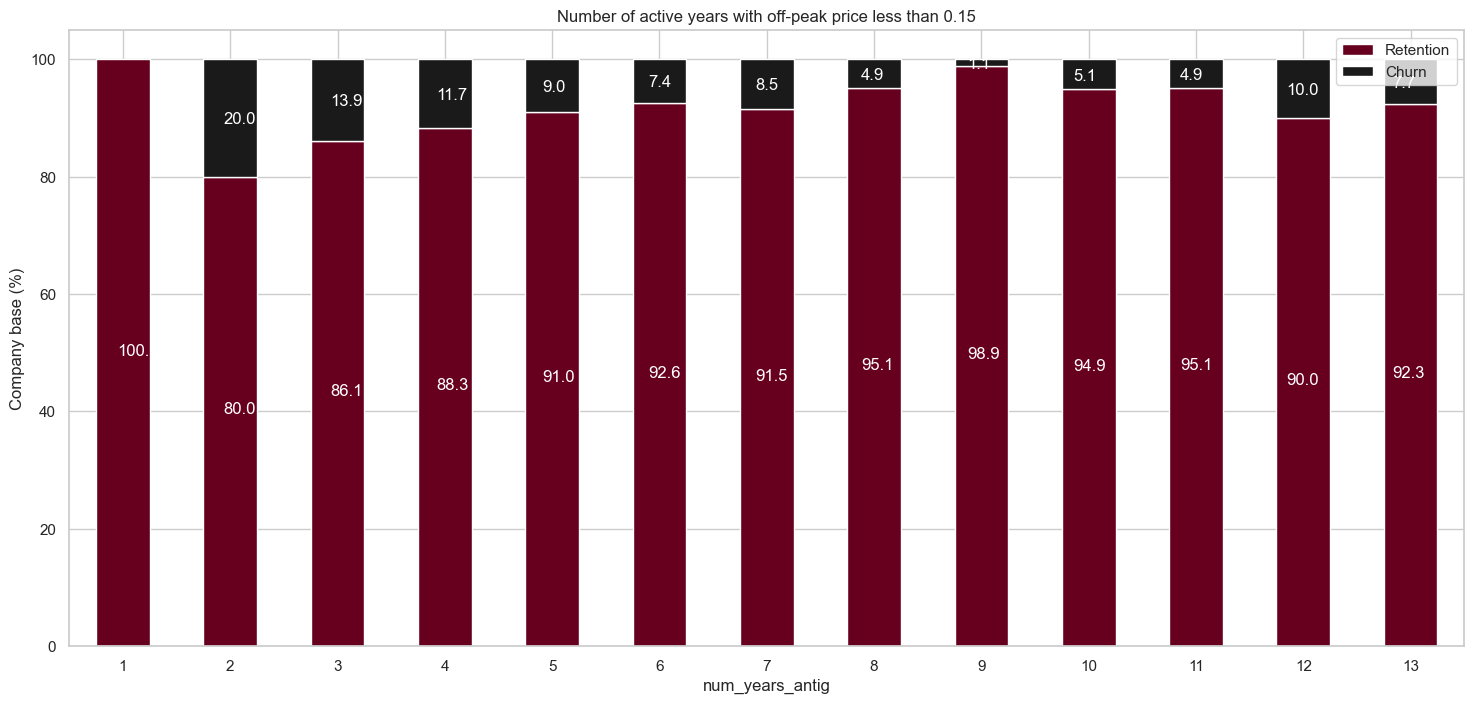

In [86]:
# Create dataframe with the number of products and years active and churn
active_years = client_df[['id', 'num_years_antig', 'forecast_price_energy_off_peak', 'churn']]

active_years_015_more = active_years[active_years['forecast_price_energy_off_peak'] >= 0.15]

active_years_015_less = active_years[active_years['forecast_price_energy_off_peak'] < 0.15]

years_total_015_more = active_years_015_more.groupby([active_product['num_years_antig'], active_product['churn']])['id'].count().unstack(level = 1).fillna(0)

years_total_015_less = active_years_015_less.groupby([active_product['num_years_antig'], active_product['churn']])['id'].count().unstack(level = 1).fillna(0)

# Calculate the percentage of churned/retained companies
years_percentage_015_more = (years_total_015_more.div(years_total_015_more.sum(axis=1), axis=0) * 100)

years_percentage_015_less = (years_total_015_less.div(years_total_015_less.sum(axis=1), axis=0) * 100)

# Plot stacked bars
plot_stacked_bars(years_percentage_015_more, 'Number of active years with off-peak price more than 0.15', (18,8), rot_=0, legend_='upper right')

plot_stacked_bars(years_percentage_015_less, 'Number of active years with off-peak price less than 0.15', (18,8), rot_=0, legend_='upper right')

- For forecasted off-peak energy prices above 0.15, there is no representation of customers with contract durations of 1, 9, 12, and 13 years, likely due to a lower rate applied to new and long-term clients. Notably, the retention rate at this price range is 100% for customers with 8- and 10-year active, which may be attributed to the discount rate applied at the 9-year mark. 
- However, it is likely that after the first year, the off-peak price for the second year may exceed 0.15 depending on various circumstances such as location or infrastructure, which could result in 100% customer churn.
- Forecasted off-peak energy prices below 0.15 also emphasizes the above points where no churn is identified for new customers and lower churn rate for long-term customers of 8,9,10,11 years.
- The 2-, 3-, and 4-year periods should receive more attention since clients have not yet built a strong commitment with the energy provider at this stage and are, therefore, more sensitive to price. If other providers offer lower off-peak prices and off-peak hours vary between suppliers, these clients may be more likely to switch.
- The same may apply to the off-peak power price

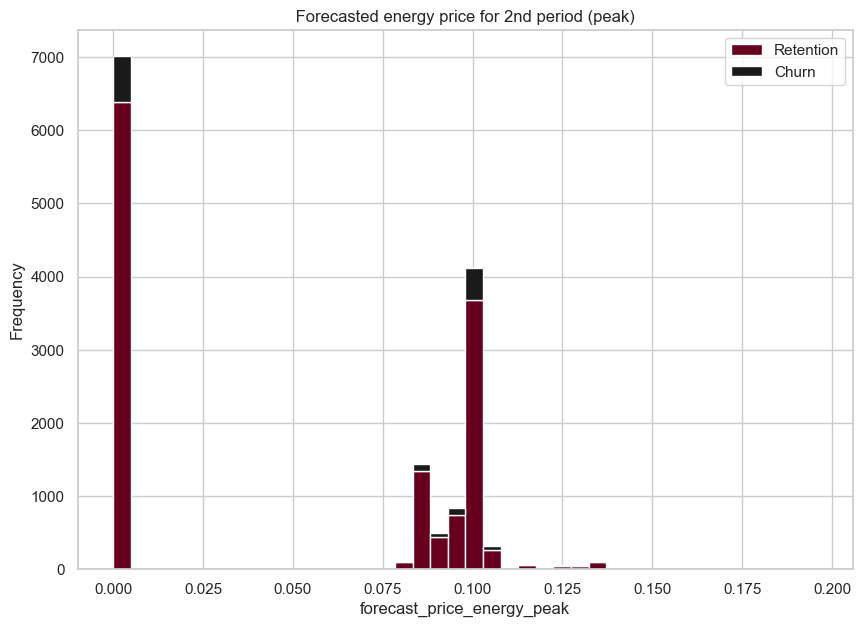

In [106]:
fig, ax = plt.subplots(nrows=1, figsize=(10,7))

plot_distribution(forecast, 'forecast_price_energy_peak', ax=ax, title_=' Forecasted energy price for 2nd period (peak) ', bins_=40)


It is notable that a large number of companies have both the peak and off-peak energy price equals 0 that have not churned which worths having a closer look into

On the other hand, peak energy price centers around the value of 0.1